In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import ensemble
from sklearn import linear_model
from sklearn import svm,naive_bayes
import joblib
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [2]:
df = pd.read_csv("data.csv",na_values={
    'bioactivity_class':['intermediate']
})
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,100000.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,12310.0
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,100000.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,50970.0
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,100000.0
...,...,...,...,...
1098,CHEMBL4640021,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,NaN,1300.0
1099,CHEMBL4642885,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...,NaN,3100.0
1100,CHEMBL4636584,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...,NaN,2500.0
1101,CHEMBL4633312,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,active,540.0


In [3]:
clean = df.fillna({
    'bioactivity_class':'active',
    'canonical_smiles': 'COc1ccc2nc3cccc(OC)c3nc2c1'
})
clean

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,100000.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,12310.0
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,100000.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,50970.0
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,100000.0
...,...,...,...,...
1098,CHEMBL4640021,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,active,1300.0
1099,CHEMBL4642885,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...,active,3100.0
1100,CHEMBL4636584,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...,active,2500.0
1101,CHEMBL4633312,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,active,540.0


In [4]:
process_df = clean.drop(['molecule_chembl_id','standard_value'],axis = "columns")


In [5]:
process_df.nunique()

canonical_smiles     1085
bioactivity_class       2
dtype: int64

In [6]:
process_df.bioactivity_class.unique()

array(['inactive', 'active'], dtype=object)

In [7]:
process_df.bioactivity_class[process_df.bioactivity_class=='active']=1
process_df.bioactivity_class[process_df.bioactivity_class=='inactive']=0
process_df


,canonical_smiles,bioactivity_class
0,COc1ccc2nc3cccc(OC)c3nc2c1,0
1,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,0
2,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,0
3,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,0
4,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,0
...,...,...
1098,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,1
1099,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...,1
1100,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...,1
1101,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...,1


In [8]:
x_valid = process_df.drop('bioactivity_class',axis = "columns")
x_valid

,canonical_smiles
0,COc1ccc2nc3cccc(OC)c3nc2c1
1,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O
2,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...
3,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1
4,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...
...,...
1098,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...
1099,CCCCCC(=O)N[C@@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OC...
1100,N=C(N)NCc1ccc(CNC(=O)[C@H](NC(=O)c2ccc(Oc3cccc...
1101,N=C(N)Nc1ccc(CNC(=O)[C@@H](NC(=O)Cc2ccc(-c3ccc...


In [9]:
y_valid = process_df.drop('canonical_smiles',axis ="columns")
y_valid

,bioactivity_class
0,0
1,0
2,0
3,0
4,0
...,...
1098,1
1099,1
1100,1
1101,1


In [10]:
smiles = []
weight = []
for get_can in x_valid.canonical_smiles:
    #Descriptors.MolWt(Chem.MolFromSmiles(get_can))
    smiles.append(get_can)

smiles[1078]

'N=C(N)NCCC[C@H](NC(=O)c1ccccc1)C(=O)N[C@@H](CCCCN)C(=O)NCC(N)=O'

In [11]:
baseData = np.arange(1,1)
i=0
for smile in smiles:
   #  print(smile)
    mol_wt = Descriptors.MolWt(Chem.MolFromSmiles(smile))
    mol_logP = Descriptors.MolLogP(Chem.MolFromSmiles(smile))
    Num_don = Lipinski.NumHDonors(Chem.MolFromSmiles(smile))
    num_ace = Lipinski.NumHAcceptors(Chem.MolFromSmiles(smile))

    row = np.array([mol_wt,mol_logP,Num_don,num_ace])

    if i==0 :
      baseData=row
    else:
      baseData= np.vstack([baseData,row])
    i=i+1
col_name=  ['MW','logP','Donors','Acceptors']
new_data_des = pd.DataFrame(data=baseData,columns=col_name)
new_data_des

,MW,logP,Donors,Acceptors
0,240.262,2.80020,0.0,4.0
1,268.224,2.44040,1.0,4.0
2,407.426,1.38560,1.0,5.0
3,306.277,3.84800,1.0,5.0
4,372.772,2.36698,0.0,8.0
...,...,...,...,...
1098,711.741,6.58767,6.0,5.0
1099,656.529,6.71840,4.0,5.0
1100,796.630,7.76857,6.0,6.0
1101,780.631,7.89447,6.0,5.0


In [12]:
for i in new_data_des.MW:
    if i<500:
        weight.append(1)
    else:
        weight.append(0)
des_df = pd.DataFrame(data=weight,columns =['MW'])
des_df

,MW
0,1
1,1
2,1
3,1
4,1
...,...
1098,0
1099,0
1100,0
1101,0


In [13]:
solub=[]
for i in new_data_des.logP:
    if i<5:
        solub.append(1)
    else:
        solub.append(0)
des_df['logP']=solub
des_df

,MW,logP
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
1098,0,0
1099,0,0
1100,0,0
1101,0,0


In [14]:
don=[]
for i in new_data_des.Donors:
    if i<5:
        don.append(1)
    else:
        don.append(0)
des_df['Donor']=don
des_df

,MW,logP,Donor
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
1098,0,0,0
1099,0,0,1
1100,0,0,0
1101,0,0,0


In [15]:
accep=[]
for i in new_data_des.Acceptors:
    if i<10:
        accep.append(1)
    else:
        accep.append(0)
des_df['Acceptors']=accep
des_df

,MW,logP,Donor,Acceptors
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
1098,0,0,0,1
1099,0,0,1,1
1100,0,0,0,1
1101,0,0,0,1


In [16]:
y_valid=y_valid.astype('int')
y_valid

,bioactivity_class
0,0
1,0
2,0
3,0
4,0
...,...
1098,1
1099,1
1100,1
1101,1


In [17]:
x_train,x_test,y_train,y_test = train_test_split(des_df,y_valid,test_size=0.3,random_state=0)

In [18]:
len(x_train)

772

In [19]:
models = {
    'svm':{
        'model': svm.SVC(gamma="auto"),
        'params':{
            'C':[1,50,100,150,200],
            'kernel':['rbf','linear']
        }
    },
    'random Forest':{
        'model': ensemble.RandomForestClassifier(),
        'params':{
            'n_estimators':[20,50,100,200,400,1000]
        }
    },
    'extra tree':{
        'model':ensemble.ExtraTreesClassifier(),
        'params':{
            'n_estimators':[20,50,100,200,400]
        }

    },
    'logistic regression':{
        'model':linear_model.LogisticRegression(),
        'params':{
            'C':[1,10,50,100]
        }
    },
    'ridge regression':{
        'model':linear_model.RidgeClassifier(),
        'params':{
            'alpha':[1,5,10],
            'tol':[0.001,0.0001,0.01]
        }
    },
    'Gaussian bayes':{
        'model':naive_bayes.GaussianNB(),
        'params':{
            
        }
    },
    'bernoulli bayes':{
        'model':naive_bayes.BernoulliNB(),
        'params':{
            'alpha':[1,5,10,15]
        }
    },
    'multinomial bayes':{
        'model':naive_bayes.MultinomialNB(),
        'params':{
            'alpha':[1,5,10,15,20]
        }
    },
}

In [20]:
score =[]
for model_name,mp in models.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=10,return_train_score=False)
    clf.fit(des_df,y_valid)
    score.append({ 
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

In [21]:
df_score = pd.DataFrame(score,columns= ['model','best_score','best_params'])
df_score

,model,best_score,best_params
0,svm,0.910278,"{'C': 50, 'kernel': 'rbf'}"
1,random Forest,0.910278,{'n_estimators': 20}
2,extra tree,0.910278,{'n_estimators': 20}
3,logistic regression,0.896658,{'C': 1}
4,ridge regression,0.894840,"{'alpha': 1, 'tol': 0.001}"
5,Gaussian bayes,0.861376,{}
6,bernoulli bayes,0.911204,{'alpha': 5}
7,multinomial bayes,0.896658,{'alpha': 1}


In [22]:
x= ['SVM','RFC','EXTC','Logistic','Ridge','GB','BB','MB']

<BarContainer object of 8 artists>

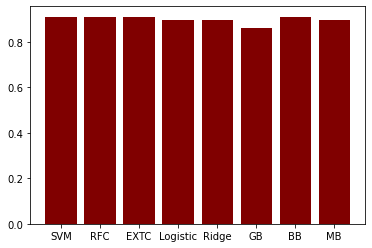

In [23]:
plt.bar(x,df_score.best_score,color="maroon")

In [24]:
real_model = naive_bayes.BernoulliNB(alpha=5)

In [25]:
real_model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BernoulliNB(alpha=5)

In [26]:
bb_score= real_model.score(x_test,y_test)

In [27]:
print("BernoulliNB Accuracy :", bb_score)


BernoulliNB Accuracy : 0.9244712990936556


In [28]:
df_real = pd.concat([des_df,y_valid],axis="columns")
df_real

,MW,logP,Donor,Acceptors,bioactivity_class
0,1,1,1,1,0
1,1,1,1,1,0
2,1,1,1,1,0
3,1,1,1,1,0
4,1,1,1,1,0
...,...,...,...,...,...
1098,0,0,0,1,1
1099,0,0,1,1,1
1100,0,0,0,1,1
1101,0,0,0,1,1


In [29]:
df_real.to_csv("data_main.csv",index=False)